In [4]:
# Dependencies
import pandas as pd
from sqlalchemy import create_engine
%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib inline
import gmaps
#set ggplot style
plt.style.use('ggplot')

# Extract CSVs into DataFrames

In [5]:
census_file = "Resources/acs_2015_census_tract_data.csv"
census_df = pd.read_csv(census_file)
census_df.head()

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


# Transform census DataFrame

In [6]:
# Create a filtered dataframe filtered by Ohio and Cuyahoga County
Census_Cuyahoga_County=census_df.loc[(census_df["State"] =="Ohio") & (census_df["County"] =="Cuyahoga")]
Census_Cuyahoga_County.head()

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
50881,39035101101,Ohio,Cuyahoga,1903,949,954,13.8,34.6,35.2,0.0,...,2.8,0.5,6.4,30.5,567,89.6,9.3,1.1,0.0,23.0
50882,39035101102,Ohio,Cuyahoga,4516,2348,2168,2.6,65.7,24.9,0.2,...,3.4,1.2,2.7,21.2,2790,78.5,20.5,1.0,0.0,4.5
50883,39035101200,Ohio,Cuyahoga,2640,1358,1282,22.5,53.7,22.2,0.4,...,12.3,5.0,3.3,20.8,899,82.9,12.0,5.1,0.0,11.6
50884,39035101300,Ohio,Cuyahoga,1897,973,924,13.5,46.4,29.5,2.1,...,5.5,1.5,3.6,28.5,861,90.6,8.2,1.2,0.0,11.4
50885,39035101400,Ohio,Cuyahoga,1932,893,1039,20.7,50.2,19.5,1.2,...,5.0,1.9,2.5,23.3,782,84.9,9.8,5.2,0.0,12.9


In [7]:
#List all columns
cols = Census_Cuyahoga_County.columns.tolist()
cols

['CensusTract',
 'State',
 'County',
 'TotalPop',
 'Men',
 'Women',
 'Hispanic',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific',
 'Citizen',
 'Income',
 'IncomeErr',
 'IncomePerCap',
 'IncomePerCapErr',
 'Poverty',
 'ChildPoverty',
 'Professional',
 'Service',
 'Office',
 'Construction',
 'Production',
 'Drive',
 'Carpool',
 'Transit',
 'Walk',
 'OtherTransp',
 'WorkAtHome',
 'MeanCommute',
 'Employed',
 'PrivateWork',
 'PublicWork',
 'SelfEmployed',
 'FamilyWork',
 'Unemployment']

In [8]:
# Create a filtered dataframe from specific columns
census_cols = ["CensusTract","TotalPop","Men","Women","Hispanic", "White","Black","Native","Asian","Pacific", "Income","IncomePerCap","Poverty","Professional",
 "Service","Office","Construction","Production","Employed","PrivateWork","PublicWork","SelfEmployed","FamilyWork","Unemployment"]
census_transformed= Census_Cuyahoga_County[census_cols].copy()
census_transformed.head()



,CensusTract,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Service,Office,Construction,Production,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
50881,39035101101,1903,949,954,13.8,34.6,35.2,0.0,13.1,0.0,...,40.2,13.8,2.5,21.2,567,89.6,9.3,1.1,0.0,23.0
50882,39035101102,4516,2348,2168,2.6,65.7,24.9,0.2,0.0,0.0,...,24.9,27.1,3.6,5.8,2790,78.5,20.5,1.0,0.0,4.5
50883,39035101200,2640,1358,1282,22.5,53.7,22.2,0.4,0.0,0.0,...,16.9,29.8,10.8,11.9,899,82.9,12.0,5.1,0.0,11.6
50884,39035101300,1897,973,924,13.5,46.4,29.5,2.1,0.3,0.0,...,31.4,15.3,0.0,27.1,861,90.6,8.2,1.2,0.0,11.4
50885,39035101400,1932,893,1039,20.7,50.2,19.5,1.2,5.7,0.0,...,28.6,18.2,6.4,28.3,782,84.9,9.8,5.2,0.0,12.9


In [9]:
# Rename the column headers
census_transformed = census_transformed.rename(columns={"CensusTract": "censustract","TotalPop": "total_population","Men": "men","Women": "women","Hispanic":"hispanic","White":"white","Black":"black",
                                                        "Native":"native","Asian":"asian","Pacific":"pacific","Income":"median_household_income","IncomePerCap":"income_per_capita","Poverty":"under_poverty_level_percentage","Professional":"professional_workers_percentage",
                                                       "Service":"service_workers_percentage","Office":"office_workers_percentage","Construction":"construction_workers_percentage",
                                                       "Production":"production_workers_percentage","Employed":"total_employed","PrivateWork":"privatework",
                                                      "PublicWork":"publicwork","SelfEmployed":"selfemployed","FamilyWork":"family_work","Unemployment":"unemployment" })
# Clean the data by dropping duplicates and setting the index
census_transformed.drop_duplicates("censustract", inplace=True)
census_transformed.set_index("censustract", inplace=True)


census_transformed.head()


,total_population,men,women,hispanic,white,black,native,asian,pacific,median_household_income,...,service_workers_percentage,office_workers_percentage,construction_workers_percentage,production_workers_percentage,total_employed,privatework,publicwork,selfemployed,family_work,unemployment
censustract,,,,,,,,,,,,,,,,,,,,,
39035101101,1903,949,954,13.8,34.6,35.2,0.0,13.1,0.0,16553.0,...,40.2,13.8,2.5,21.2,567,89.6,9.3,1.1,0.0,23.0
39035101102,4516,2348,2168,2.6,65.7,24.9,0.2,0.0,0.0,39528.0,...,24.9,27.1,3.6,5.8,2790,78.5,20.5,1.0,0.0,4.5
39035101200,2640,1358,1282,22.5,53.7,22.2,0.4,0.0,0.0,18262.0,...,16.9,29.8,10.8,11.9,899,82.9,12.0,5.1,0.0,11.6
39035101300,1897,973,924,13.5,46.4,29.5,2.1,0.3,0.0,19872.0,...,31.4,15.3,0.0,27.1,861,90.6,8.2,1.2,0.0,11.4
39035101400,1932,893,1039,20.7,50.2,19.5,1.2,5.7,0.0,28043.0,...,28.6,18.2,6.4,28.3,782,84.9,9.8,5.2,0.0,12.9


In [10]:
# Create a filtered dataframe from specific columns for the census employment type table
census_employment_type_columns = [ "total_employed","privatework","publicwork","selfemployed"]
census_employment_type=census_transformed[census_employment_type_columns].copy()
census_employment_type.head()

,total_employed,privatework,publicwork,selfemployed
censustract,,,,
39035101101,567,89.6,9.3,1.1
39035101102,2790,78.5,20.5,1.0
39035101200,899,82.9,12.0,5.1
39035101300,861,90.6,8.2,1.2
39035101400,782,84.9,9.8,5.2


In [11]:
# Create a filtered dataframe from specific columns for the census income table
census_income_columns = [ "median_household_income","income_per_capita","under_poverty_level_percentage"]
census_income=census_transformed[census_income_columns].copy()
census_income.head()

,median_household_income,income_per_capita,under_poverty_level_percentage
censustract,,,
39035101101,16553.0,12081.0,57.2
39035101102,39528.0,34094.0,11.2
39035101200,18262.0,16663.0,43.3
39035101300,19872.0,19636.0,39.6
39035101400,28043.0,14137.0,29.8


In [12]:
# Create a filtered dataframe from specific columns for the census ethnicity table
census_ethnicity_columns = [ "total_population","hispanic","white","black","native","asian","pacific"]
census_ethnicity=census_transformed[census_ethnicity_columns].copy()
census_ethnicity.head()

,total_population,hispanic,white,black,native,asian,pacific
censustract,,,,,,,
39035101101,1903,13.8,34.6,35.2,0.0,13.1,0.0
39035101102,4516,2.6,65.7,24.9,0.2,0.0,0.0
39035101200,2640,22.5,53.7,22.2,0.4,0.0,0.0
39035101300,1897,13.5,46.4,29.5,2.1,0.3,0.0
39035101400,1932,20.7,50.2,19.5,1.2,5.7,0.0


In [13]:
# Create a filtered dataframe from specific columns for the census gender table
census_gender_columns = [ "total_population","men","women"]
census_gender=census_transformed[census_gender_columns].copy()
census_gender.head()

,total_population,men,women
censustract,,,
39035101101,1903,949,954
39035101102,4516,2348,2168
39035101200,2640,1358,1282
39035101300,1897,973,924
39035101400,1932,893,1039


In [14]:
# Create a filtered dataframe from specific columns for the census professions table
census_professions_columns = [ "total_employed","professional_workers_percentage","service_workers_percentage","office_workers_percentage","construction_workers_percentage","production_workers_percentage"]
census_professions=census_transformed[census_professions_columns].copy()
census_professions.head()

,total_employed,professional_workers_percentage,service_workers_percentage,office_workers_percentage,construction_workers_percentage,production_workers_percentage
censustract,,,,,,
39035101101,567,22.4,40.2,13.8,2.5,21.2
39035101102,2790,38.6,24.9,27.1,3.6,5.8
39035101200,899,30.6,16.9,29.8,10.8,11.9
39035101300,861,26.2,31.4,15.3,0.0,27.1
39035101400,782,18.5,28.6,18.2,6.4,28.3


In [15]:
# Create a filtered dataframe from specific columns for the census population table
census_population_columns = [ "total_population"]
census_population=census_transformed[census_population_columns].copy()
census_population.head()

,total_population
censustract,
39035101101,1903
39035101102,4516
39035101200,2640
39035101300,1897
39035101400,1932


# Create database connection

In [16]:
connection_string = "postgres:postgres@localhost:5432/Voting_Pattern"
engine = create_engine(f'postgresql://{connection_string}')

In [17]:
# Confirm tables
engine.table_names()

['census_voters_bedford',
 'census_population',
 'voters',
 'census_gender',
 'census_professions',
 'census_ethnicity',
 'census_employment_type',
 'census_income',
 'elections',
 'census_to_city']

# Load DataFrames into database

In [18]:
#census_population.to_sql(name='census_population', con=engine, if_exists='append', index=True)

In [19]:
#census_gender.to_sql(name='census_gender', con=engine, if_exists='append', index=True)

In [20]:
#census_professions.to_sql(name='census_professions', con=engine, if_exists='append', index=True)

In [21]:
#census_ethnicity.to_sql(name='census_ethnicity', con=engine, if_exists='append', index=True)

In [22]:
#census_employment_type.to_sql(name='census_employment_type', con=engine, if_exists='append', index=True)

In [23]:
#census_income.to_sql(name='census_income', con=engine, if_exists='append', index=True)

In [31]:
census_V_file = "Resources/Census_Voting_Bedford.csv"
Census_Voting_df = pd.read_csv(census_V_file)
Census_Voting_df.head()

,city,party,age,election,men_population,women_population,hispanic_population,white_population,black_population,native_population,asian_population,pacific_population,voted_cnt,not_voted_cnt,total_population
0,BEDFORD,DEM,98,Nov 06 Election,5978,6890,7.5,179.3,201.2,0.0,3.8,0.0,8,0,12868
1,BEDFORD,DEM,97,Nov 06 Election,5978,6890,7.5,179.3,201.2,0.0,3.8,0.0,12,0,12868
2,BEDFORD,DEM,96,Nov 06 Election,5978,6890,7.5,179.3,201.2,0.0,3.8,0.0,4,0,12868
3,BEDFORD,DEM,95,Nov 06 Election,5978,6890,7.5,179.3,201.2,0.0,3.8,0.0,16,0,12868
4,BEDFORD,DEM,94,Nov 06 Election,5978,6890,7.5,179.3,201.2,0.0,3.8,0.0,4,0,12868


In [32]:
Census_Voting_df[['hispanic_population']]=Census_Voting_df[['hispanic_population']].astype(float)

In [33]:
Census_Voting_df.groupby(['election','party']).mean()

age  men_population  women_population  \
election        party                                                
Nov 06 Election DEM    71.500000          5978.0            6890.0   
                GRE    69.666667          5978.0            6890.0   
                LIB    62.000000          5978.0            6890.0   
                NOPTY  73.114754          5978.0            6890.0   
                REP    72.117647          5978.0            6890.0   
Nov 07 Election DEM    71.500000          5978.0            6890.0   
                GRE    69.666667          5978.0            6890.0   
                LIB    62.000000          5978.0            6890.0   
                NOPTY  73.114754          5978.0            6890.0   
                REP    72.117647          5978.0            6890.0   
Nov 08 Election DEM    71.500000          5978.0            6890.0   
                GRE    69.666667          5978.0            6890.0   
                LIB    62.000000          5978.0            6890.0   
                NOPTY  73.114754          5978.0            6890.0   
                REP    72.117647          5978.0            6890.0   
Nov 09 Election DEM    71.500000          5978.0            6890.0   
                GRE    69.666667          5978.0            6890.0   
                LIB    62.000000          5978.0            6890.0   
                NOPTY  73.114754          5978.0            6890.0   
                REP    72.117647          5978.0            6890.0   
Nov 10 Election DEM    71.500000          5978.0            6890.0   
                GRE    69.666667          5978.0            6890.0   
                LIB    62.000000          5978.0            6890.0   
                NOPTY  73.114754          5978.0            6890.0   
                REP    72.117647          5978.0            6890.0   
Nov 11 Election DEM    71.500000          5978.0            6890.0   
                GRE    69.666667          5978.0            6890.0   
                LIB    62.000000          5978.0            6890.0   
                NOPTY  73.114754          5978.0            6890.0   
                REP    72.117647          5978.0            6890.0   
...                          ...             ...               ...   
Nov 13 Election DEM    71.500000          5978.0            6890.0   
                GRE    69.666667          5978.0            6890.0   
                LIB    62.000000          5978.0            6890.0   
                NOPTY  73.114754          5978.0            6890.0   
                REP    72.117647          5978.0            6890.0   
Nov 14 Election DEM    71.500000          5978.0            6890.0   
                GRE    69.666667          5978.0            6890.0   
                LIB    62.000000          5978.0            6890.0   
                NOPTY  73.114754          5978.0            6890.0   
                REP    72.117647          5978.0            6890.0   
Nov 15 Election DEM    71.500000          5978.0            6890.0   
                GRE    69.666667          5978.0            6890.0   
                LIB    62.000000          5978.0            6890.0   
                NOPTY  73.114754          5978.0            6890.0   
                REP    72.117647          5978.0            6890.0   
Nov 16 Election DEM    71.500000          5978.0            6890.0   
                GRE    69.666667          5978.0            6890.0   
                LIB    62.000000          5978.0            6890.0   
                NOPTY  73.114754          5978.0            6890.0   
                REP    72.117647          5978.0            6890.0   
Nov 17 Election DEM    71.500000          5978.0            6890.0   
                GRE    69.666667          5978.0            6890.0   
                LIB    62.000000          5978.0            6890.0   
                NOPTY  73.114754          5978.0            6890.0   
                REP    72.117647       

TypeError: Empty 'DataFrame': no numeric data to plot

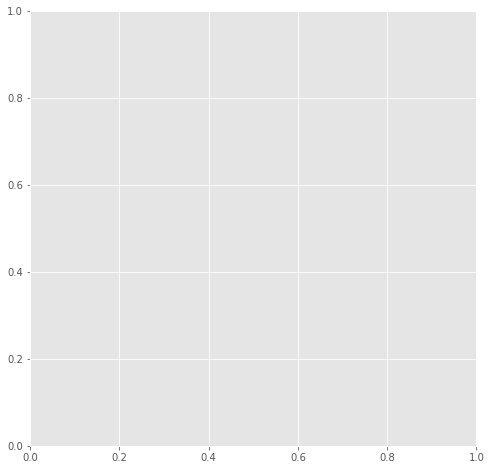

In [34]:
# Use unstack() to Plot all users response as a line chart
fig, ax = plt.subplots(figsize=(8,8))
Census_Voting_df.unstack().plot(ax=ax)
plt.title("Voting Trend")
plt.xlabel("election")
plt.ylabel("Voters")
leg = ax.legend()